# Exam 14th of January 2020 for the course 1MS041 (Introduction to Data Science)
1. Fill in your anonymous exam code in the cell below.
2. Complete the Problems by following instructions.
3. When done, submit this file with your solutions saved, as instructed on Studium.

Any questions regarding the exam can be asked by sending a message through Studium to the teacher. When asking a question about a specific problem, be sure to explain the problem clearly as all exams are shuffled in order.

In [ ]:
# Enter your anonymous exam id by replacing XXXX in this cell below
# do NOT delete this cell
MyAnonymousExamID = 'XXX'

---
## PROBLEM 1
Maximum Points = 5


Consider the following matrix
$$
    M = 
    \begin{bmatrix}
        1 & 1 \\
        0 & 3 \\
        3 & 0
    \end{bmatrix}
$$
Manually, by hand, produce the
* [1p] Rank: `rank`
* [1p] Left singular vectors in matrix form: `V`
* [1p] Singular values in matrix form: `D`
* [1p] Right singular vectors in matrix form: `U`

If $UDV^T = M$ then [1p].

When answering these questions, use the sagemath `matrix` format as the example below. Use exact answers, i.e. use `sqrt(3)` if that appears in the calculation.

> To make sure that we all agree on signs, make sure that the sign of the first component of each singular vector is positive.

In [1]:
M = matrix([[1,1],[0,3],[3,0]])
MTM = matrix([[10,1],[1,10]])

In [16]:
rank = 2 # [1p] The rank of the matrix M
V = matrix([[1/2**0.5, 1/2**0.5], [1/2**0.5, -1/2**0.5]]) # [1p] Matrix of singular vectors, each vector is a column of V
D = matrix([[11**0.5, 0], [0, 9**0.5]]) # [1p] The square matrix with the singular values on the diagonal
U = matrix([[2/22**0.5, 0],[3/22**0.5, 1/2**0.5],[3/22**0.5, -1/2**0.5]]) # [1p] The matrix of right singular vectors (each vector is a column of U)
print(U*D*V.transpose())
## Hint, use V.nrows() and V.ncols() etc. to make sure that you got the dimensions as you
## expect. If nrows does not work, then you should make sure you are using `matrix()` from sagemath

## [1p] Hint: Check that U*D*V.transpose() == M
---
## PROBLEM 2
Maximum Points = 5

[    1.00000000000000     1.00000000000000]
[    3.00000000000000 2.22044604925031e-16]
[2.22044604925031e-16     3.00000000000000]



Consider the $n$ IID $\theta$-parametric family of rescaled Rademacher random variables with the following probability mass function:

$$
f(x; \theta) = 
\begin{cases} 
\theta & \text{ if } x=+10\\
1-\theta & \text{ if } x=-10\\
0 & \text{ otherwise}.
\end{cases}
$$

Your task now is to perform a Wald Test of size $\alpha=0.05$ to try to reject the null hypothesis that the chance of seeing a $+10$ is exactly $1/2$, i.e.,
$$\displaystyle{H_0: \theta^*=\theta_0 \quad \text{ versus } \quad H_1: \theta^* \neq \theta_0, \qquad \text{ with }\theta_0=0.5}$$
Show you work by replacing `XXX`s with the right expressions in the cell below.

In [17]:
dataSamples2 = np.array([-10,+10,+10,-10,-10,-10,+10,+10,-10,-10,-10,+10,+10,-10,+10,+10,+10])
# HINT: to get the counts of +10s and -10s, perhaps a useful statistic for the likelihood
print (sum(dataSamples2==-10)) # number of -10s
print (sum(dataSamples2==+10)) # number of +10s

8
9


In [1]:
## HINT: Think how the likelihood here is related to that for Bernoulli trials

## STEP 1: get the MLE thetaHat, 
### either by hand or numerically
n=17
thetaHat=10/n
print ("mle thetaHat = ",thetaHat)

## STEP 2: get the NullTheta or theta0
NullTheta=1/2
print ("Null value of theta under H0 = ", NullTheta)

## STEP 3: get estimated standard error
seTheta=(thetaHat*(1-thetaHat)/17)**(1/2) # recall standard error comes from Fisher Information
print ("estimated standard error",seTheta)

# STEP 4: get Wald Statistic
W=(thetaHat-NullTheta)/seTheta
print ("Wald statistic = ",W)

# STEP 5: conduct the size alpha=0.05 Wald test
# do NOT change anything below
rejectNull1 = abs(W) > 2.0 # alpha=0.05, so z_{alpha/2} =1.96 approx=2.0
if (rejectNull1):
    print ("we reject the null hypothesis that theta_0=0.5")
else:
    print ("we fail to reject the null hypothesis that theta_0=0.5")

mle thetaHat =  10/17
Null value of theta under H0 =  1/2
estimated standard error 1/17*sqrt(70/17)
Wald statistic =  51/140*sqrt(70/17)
we fail to reject the null hypothesis that theta_0=0.5


---
## PROBLEM 3
Maximum Points = 5


In the next cells the earthquake data is analyzed further, specifically depth and magnitude.

Your task is to understand the analysis and continue with the following:

1. Make a residual plot for the fit and discuss briefly the scatter of residuals. Explain what values that are farthest from the x-axis (both below and above) mean here.
2. Conduct a Wald test with alpha at 5% of the null hypothesis that $\beta_1=0$. State your conclusion by setting the Boolean variable `RejectNullHypothesisForProblem4` to `True` if you reject and `False` if you do not.

In [4]:
# Lets extract the depth and magnitude from myProcessedList 
# (which contains: longitude, latitude, magnitude, depth and the origin time)
import numpy as np
def getLonLatMagDepTimes(NZEQCsvFileName):
    '''returns longitude, latitude, magnitude, depth and the origin time as unix time
    for each observed earthquake in the csv filr named NZEQCsvFileName'''
    from datetime import datetime
    import time
    from dateutil.parser import parse
    import numpy as np
    
    with open(NZEQCsvFileName) as f:
        reader = f.read() 
        dataList = reader.split('\n')
        
    myDataAccumulatorList =[]
    for data in dataList[1:-1]:
        dataRow = data.split(',')
        myTimeString = dataRow[2] # origintime
        # let's also grab longitude, latitude, magnitude, depth
        myDataString = [dataRow[4],dataRow[5],dataRow[6],dataRow[7]]
        try: 
            myTypedTime = time.mktime(parse(myTimeString).timetuple())
            myFloatData = [float(x) for x in myDataString]
            myFloatData.append(myTypedTime) # append the processed timestamp
            myDataAccumulatorList.append(myFloatData)
        except TypeError as e: # error handling for type incompatibilities
            print ('Error:  Error is ', e)
    #return np.array(myDataAccumulatorList)
    return myDataAccumulatorList
myProcessedList = getLonLatMagDepTimes('/Users/imchengliang/Downloads/code/Introduction to Data Science/starting_package/data/earthquakes.csv')
eqData = np.array(myProcessedList)[:,[3,2]]
eqDepth = eqData[:,0]
eqMagnitude = eqData[:,1]

In [5]:
def estimate_coefficients(x, y): 
    # size of the dataset  
    n = np.size(x) 
    # mean of x and y
    mean_x, mean_y = np.mean(x), np.mean(y) 
    # xy cross-deviation and xx deviatio
    SS_xy = np.sum(y*x) - n*mean_y*mean_x
    SS_xx = np.sum(x*x) - n*mean_x*mean_x
    # calculating LSE of regression coefficients 
    b1_hat = SS_xy / SS_xx 
    b0_hat = mean_y - b1_hat*mean_x 
    sigma_hat2 = np.mean((y - (b0_hat + b1_hat * x))^2)
    if n>2:
        sigma_hat2 = sigma_hat2*n/(n-2)
    sigma_hat=np.sqrt(sigma_hat2)
    return(b0_hat, b1_hat, sigma_hat)

def standard_errors(x,y):
    n = np.size(x) 
    b0_hat,b1_hat,s_hat = estimate_coefficients(x,y)
    mean_x = np.mean(x)
    s2X = np.mean( (x-mean_x)^2 )
    se_b1 = s_hat/np.sqrt(s2X*n)
    se_b0 = se_b1*np.sqrt(np.mean(x^2))
    return (se_b0, se_b1)

def plot_regression_line(x, y, b): 
    # plotting the data points on a graph
    plt.scatter(x, y, color = "m",marker = "o", s = 10) 
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
    # plotting the fitted regression line
    plt.plot(x, y_pred, color = "b")
    # putting generic labels for x and y axis
    plt.xlabel('x') 
    plt.ylabel('y') 
    # function to show plotted graph
    plt.show()

def SimpleLinearRegression(x,y): 
    # estimating coefficients 
    b = estimate_coefficients(x, y) 
    print("Estimated coefficients:\nb0_hat = {} \nb1_hat = {}\nsigma_hat = {}".format(b[0], b[1],b[2])) 
    # plotting fitted regression line  with data
    plot_regression_line(x, y, b)

Estimated coefficients:
b0_hat = 1.9277685616900202 
b1_hat = 0.003674868377057924
sigma_hat = 0.63280400181365


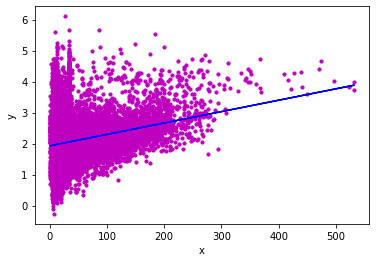

In [6]:
import matplotlib.pyplot as plt
SimpleLinearRegression(eqDepth,eqMagnitude)

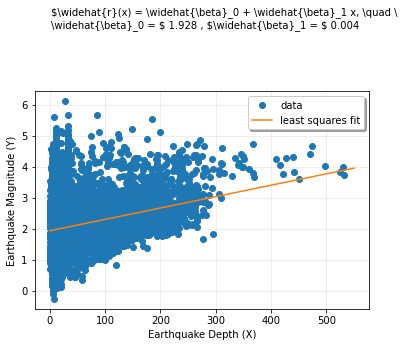

In [7]:
from scipy.linalg import lstsq
import matplotlib.pyplot as plt
import numpy as np

M1 = eqDepth[:, np.newaxis]^[0, 1]
b, res, rnk, s = lstsq(M1, eqMagnitude)
plt.plot(eqDepth, eqMagnitude, 'o', label='data')

xx = np.linspace(0.0, 550, 101)
yy = b[0] + b[1]*xx 
plt.plot(xx, yy, label='least squares fit')
plt.xlabel('Earthquake Depth (X)')
plt.ylabel('Earthquake Magnitude (Y)')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.text(3, 8.5, r'$\widehat{r}(x) = \widehat{\beta}_0 + \widehat{\beta}_1 x, \quad \
\widehat{\beta}_0 = $ %(b0)0.3f , $\widehat{\beta}_1 = $ %(b1)0.3f' % {'b0': b[0], 'b1': b[1]} )
plt.show()


### Part 1. Do a residual analysis by creating a cell below 

You should make a plot of the residuals from the fitted model above and explain your findings between the two `---` lines in this cell.

---

The farthest points from x are concentrated near 0, indicating a decrease in  variance, ie not consistent variance needed to assume normality

---

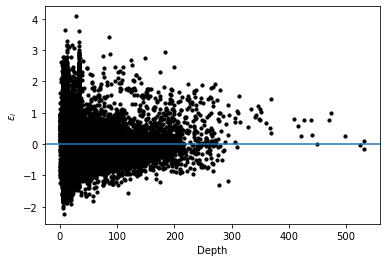

In [8]:
predictedMAG = 1.9277685616900202  + 0.003674868377057924*eqDepth
residuals = eqMagnitude - predictedMAG
plt.scatter(eqDepth, residuals, color = "k",marker = "o", s = 10) 
plt.axhline()
# putting generic labels for x and y axis
plt.ylabel('$\\epsilon_i$') 
plt.xlabel('Depth') # draw a y=0 line
plt.show()
# in general we want residuals to be Normally distributes about 0 with the same variance

In [9]:
### Part 2. Do a Wald Test of H0: beta_1 = 0

# show your working here

b0_hat, b1_hat, s_hat = estimate_coefficients(eqDepth,eqMagnitude)
se_b0,se_b1 = standard_errors(eqDepth,eqMagnitude)
W = (b1_hat-0)/se_b1
if abs(W > 2):
    print ("Reject H0 that beta_1=0 at alpha=0.05, since W = ",W)
else:
    print ("fail to reject H0 that beta_1=0 at alpha=0.05, since W = ",W)
# write down your conclusion by replacing XXX in next line
# You will not get points for randomly guessing True/False
RejectNullHypothesisForProblem4 = True

Reject H0 that beta_1=0 at alpha=0.05, since W =  40.15482218345964


---
## PROBLEM 4
Maximum Points = 5

1. Take the string `prideAndPrejudiceFirstChapter` and split it by `' '` into a list of "words" and put this in `words`.
2. Consider the list of words as a list of states, precisely as in the `wet` - `dry` Markov chain that we studied. We model this list of states using a Markov chain, as such there is an associated transition matrix $P$. The first four words are `['it', 'is', 'a', 'truth']`, if we think of this as a Markov chain  we will have transitions from `'it'` to `'is'` for instance, as such there is a $p_{\textrm{'it','is'}}$, i.e. a transition probability from `'it'` to `'is'`.
3. Your goal is to find the maximum likelihood estimate of $P$, recall from notebook 13 that for two states we have
$$
    \widehat{p}_{0,0} = \frac{n_{0,0}}{n_{0,0}+n_{0,1}} 
    \quad \text{and} \quad 
    \widehat{p}_{1,1} = \frac{n_{1,1}}{n_{1,0}+n_{1,1}}
$$ 
there is nothing special about two states, so for arbitrary number of states $i=1,\ldots,N$ we have
$$
    \widehat{p}_{i,j} = \frac{n_{i,j}}{\sum_{k=1}^N n_{i,k}} 
$$
4. The order of the indices should be the same as the list `unique_words` i.e. the first word in that list corresponds to $i=0$, the second $i=1$ etc.

In [21]:
# REQUIRED-CELL
# DO NOT MODIFY this cell
# Evaluate this cell before trying this PROBLEM so that the required functions and variables are loaded
def makeFreqDict(myDataList):
    '''Make a frequency mapping out of a list of data.
    
    Param myDataList, a list of data.
    Return a dictionary mapping each unique data value to its frequency count.'''
    
    freqDict = {} # start with an empty dictionary
        
    for res in myDataList:
        
        if res in freqDict: # the data value already exists as a key
                freqDict[res] = freqDict[res] + 1 # add 1 to the count using sage integers
        else: # the data value does not exist as a key value
            freqDict[res] = 1 # add a new key-value pair for this new data value, frequency 1
        
    return freqDict # return the dictionary created

# end of makeFreqDict(...)

prideAndPrejudiceFirstChapter = '''It is a truth universally acknowledged, that a single man in
    possession of a good fortune, must be in want of a wife.

    However little known the feelings or views of such a man may be
    on his first entering a neighbourhood, this truth is so well
    fixed in the minds of the surrounding families, that he is
    considered the rightful property of some one or other of their
    daughters.

    “My dear Mr. Bennet,” said his lady to him one day, “have you
    heard that Netherfield Park is let at last?”

    Mr. Bennet replied that he had not.

    “But it is,” returned she; “for Mrs. Long has just been here, and
    she told me all about it.”

    Mr. Bennet made no answer.

    “Do you not want to know who has taken it?” cried his wife
    impatiently.

    “_You_ want to tell me, and I have no objection to hearing it.”

    This was invitation enough.

    “Why, my dear, you must know, Mrs. Long says that Netherfield is
    taken by a young man of large fortune from the north of England;
    that he came down on Monday in a chaise and four to see the
    place, and was so much delighted with it, that he agreed with Mr.
    Morris immediately; that he is to take possession before
    Michaelmas, and some of his servants are to be in the house by
    the end of next week.”

    “What is his name?”

    “Bingley.”

    “Is he married or single?”

    “Oh! Single, my dear, to be sure! A single man of large fortune;
    four or five thousand a year. What a fine thing for our girls!”

    “How so? How can it affect them?”

    “My dear Mr. Bennet,” replied his wife, “how can you be so
    tiresome! You must know that I am thinking of his marrying one of
    them.”

    “Is that his design in settling here?”

    “Design! Nonsense, how can you talk so! But it is very likely
    that he _may_ fall in love with one of them, and therefore you
    must visit him as soon as he comes.”

    “I see no occasion for that. You and the girls may go, or you may
    send them by themselves, which perhaps will be still better, for
    as you are as handsome as any of them, Mr. Bingley may like you
    the best of the party.”

    “My dear, you flatter me. I certainly _have_ had my share of
    beauty, but I do not pretend to be anything extraordinary now.
    When a woman has five grown-up daughters, she ought to give over
    thinking of her own beauty.”

    “In such cases, a woman has not often much beauty to think of.”

    “But, my dear, you must indeed go and see Mr. Bingley when he
    comes into the neighbourhood.”

    “It is more than I engage for, I assure you.”

    “But consider your daughters. Only think what an establishment it
    would be for one of them. Sir William and Lady Lucas are
    determined to go, merely on that account, for in general, you
    know, they visit no newcomers. Indeed you must go, for it will be
    impossible for _us_ to visit him if you do not.”

    “You are over-scrupulous, surely. I dare say Mr. Bingley will be
    very glad to see you; and I will send a few lines by you to
    assure him of my hearty consent to his marrying whichever he
    chooses of the girls; though I must throw in a good word for my
    little Lizzy.”

    “I desire you will do no such thing. Lizzy is not a bit better
    than the others; and I am sure she is not half so handsome as
    Jane, nor half so good-humoured as Lydia. But you are always
    giving _her_ the preference.”

    “They have none of them much to recommend them,” replied he;
    “they are all silly and ignorant like other girls; but Lizzy has
    something more of quickness than her sisters.”

    “Mr. Bennet, how can you abuse your own children in such a way?
    You take delight in vexing me. You have no compassion for my poor
    nerves.”

    “You mistake me, my dear. I have a high respect for your nerves.
    They are my old friends. I have heard you mention them with
    consideration these last twenty years at least.”

    “Ah, you do not know what I suffer.”

    “But I hope you will get over it, and live to see many young men
    of four thousand a year come into the neighbourhood.”

    “It will be no use to us, if twenty such should come, since you
    will not visit them.”

    “Depend upon it, my dear, that when there are twenty, I will
    visit them all.”

    Mr. Bennet was so odd a mixture of quick parts, sarcastic humour,
    reserve, and caprice, that the experience of three-and-twenty
    years had been insufficient to make his wife understand his
    character. _Her_ mind was less difficult to develop. She was a
    woman of mean understanding, little information, and uncertain
    temper. When she was discontented, she fancied herself nervous.
    The business of her life was to get her daughters married; its
    solace was visiting and news.'''.lower()

import re
subs = '''_;.,”“?!'''
for sub in subs:
    prideAndPrejudiceFirstChapter = prideAndPrejudiceFirstChapter.replace(sub,' ')
prideAndPrejudiceFirstChapter = re.sub('\\s+', ' ',prideAndPrejudiceFirstChapter).strip()

In [25]:
# Part 1, find the words by splitting prideAndPrejudiceFirstChapter on ' ',
# Make sure you ran the cell above before you try this
words = re.sub('\\s+', ' ', prideAndPrejudiceFirstChapter).split(' ')
unique_words = sorted(set(words)) # The unique words
n_words = len(unique_words) # The number of unique words


In [28]:
# Part 2, count the different transitions
transitions = [(t1,t2) for (t1,t2) in zip(words[0:(len(words)-2)], words[1:(len(words)-1)])] 

# A list containing tuples ex: ('it','is') of all transitions in the text

transition_counts = {}
for i in transitions:
    if i in transition_counts:
        transition_counts[i] += 1
    else:
        transition_counts[i] = 1 
# A dictionary that counts the number of each transition 
# ex: ('it','is'):4

indexToWord = {}
j=0
for i in unique_words:
    indexToWord[j] = i
    j= j+ 1 
# A dictionary that maps the n-1 number to the n:th unique_word,
# ex: 0:'a'

wordToIndex = {} # The inverse function of indexToWord, 
j = 0
for i in unique_words:
    wordToIndex[i] = j
    j= j+ 1 
# The inverse function of indexToWord, 
# ex: 'a':0

In [29]:
# Part 3, finding the maximum likelihood estimate of the transition matrix
import numpy as np

transition_matrix = np.empty([len(unique_words),len(unique_words)]) # a numpy array of size (n_words,n_words)
for i in range(len(unique_words)):
    for j in range(len(unique_words)):
        if (indexToWord[i],indexToWord[j]) in transition_counts:
            transition_matrix[i,j] = transition_counts[(indexToWord[i],indexToWord[j])]
        else:
            transition_matrix[i,j] = 0
    
for i in range(len(unique_words)):
        if sum(transition_matrix[i,:]) != 0:
            transition_matrix[i,:] = transition_matrix[i,:]/sum(transition_matrix[i,:])
# The transition matrix should be ordered in such a way that
# p_{'it','is'} = transition_matrix[wordToIndex['it'],wordToIndex['is']]

# Make sure that the transition_matrix does not contain np.nan from division by zero for instance

---
#### Local Test for PROBLEM 4
Use the cell below to evaluate the feasibility of your answer.

In [30]:
# Once you have created all your functions, you can make a small test here to see
# what would be generated from your model.

start = np.zeros(shape=(n_words,1))
start[0,0] = 1

current_pos = start
for i in range(100):
    random_word_index = np.random.choice(range(n_words),p=current_pos.reshape(-1))
    current_pos = np.zeros_like(start)
    current_pos[random_word_index] = 1
    print(indexToWord[random_word_index],end=' ')
    current_pos = (current_pos.T@transition_matrix).T

a neighbourhood it that he comes i desire you must know they visit him if you do not you must throw in want of them sir william and therefore you but lizzy is a few lines by a year what i am sure a single oh single oh single man of such cases a neighbourhood it would be so odd a good fortune from the neighbourhood it that netherfield park is a good fortune four to be no occasion for mrs long has not a chaise and therefore you are determined to develop she was to be anything extraordinary now 

---
## PROBLEM 5
Maximum Points = 5


1. [1p] Draw a uniform random point $X$ on the surface of the unit sphere in $\mathbb{R}^d$. What is the variance of $X_1$ (the first coordinate)? Solve this using pen and paper, then fill in the answer below in `variance_x1_problem7`.
2. [1p] How large must $\epsilon$ be for $99\%$ of the volume of a $d$-dimensional unit-radius ball to lie in the shell of $\epsilon$-thickness at the surface of the ball?
3. [3p] The volume of the unit ball is given by
$$
    V(d) = \frac{2 \pi^{\frac{d}{2}}}{d \Gamma(\frac{d}{2})} = \frac{ \pi^{\frac{d}{2}}}{ (\frac{d}{2})!}
$$
What function of $d$ would the radius need to be for a ball or radius $r$ to have approximately constant volume as a function of $d$? Hint use Stirlings formula $n! \approx (n/e)^n$.

In [53]:
# Part1, what is the value of the variance for problem 1
d = var('d')
# Use exact expression, use rationals and not 1.0
variance_x1_problem7 = 1/(d + 2)
#variance_x1_problem7 = XXX # Fill this as a function of d (sagemath symbolic expression)

In [32]:
# Part 2, what is the value of epsilon for question 2
d = var('d')
# Use exact expression, use rationals and not 1.0
epsilon = XXX # Fill this as a function of d (sagemath symbolic expression)

NameError: name 'XXX' is not defined

In [56]:
#import math
# Part 3, what is the radius from problem 3
d = var('d')
# Use exact expression, use rationals and not 1.0.
r = ((3/4)*((pi^((d-2)/2))/((d/2*math.e)^(d/2))))**(1/3)

---
## PROBLEM 6
Maximum Points = 5


Consider the data `X` and `y`, in the cell below. `X` denotes $20$ points in $\mathbb{R}^2$ and `y` corresponds to the labels for these points, i.e. it is a classification problem.

1. Implement the function `perceptron` by filling in `XXX`.
2. Use your implemented `perceptron` function to compute a vector (numpy array) $\hat w$ with shape `(3,1)` such that 
$$
    (\hat w \cdot \hat x_i) l_i > 0, \quad \forall i=1,\ldots,20
$$
put your answer in `hat_w` below \
3. Use the vector $\hat w$ that you just found and compute $r$ (put your result in `r`), finally use this to give an upper bound to the number of iterations needed for the perceptron algorithm to converge on this dataset, see the Theorem in notebook 15. Put the result in `iteration_bound`.

In [13]:

X = np.array([[0.14774693918368506,0.8537253157278155],[-0.1755517430286779,0.8979710703337818],[0.5227216475286975,0.7448281947022451],[-0.5071170511153492,0.8002027400836075],[-0.39436968212400453,1.0177689414422981],[-0.3983065780966649,1.0443663197782966],[-0.08652771617599643,0.48036820824519255],[0.15352541170101042,0.6820807981911706],[-0.3303348532791869,1.120673883903539],[-0.2656220857139274,0.8526638282828739],[0.7259603693529442,0.25428467532034965],[0.4577253912481767,-0.2358809079980879],[0.9722462145222105,0.13128550836973255],[0.4089349951770505,-0.09503914544452634],[0.9718156747909192,0.3524307824261209],[1.2009353774940565,-0.25004126389987974],[1.271791635779178,-0.07571928320750206],[0.36784476124502913,-0.23743021661715671],[0.8918396050420891,-0.1029336332277948],[0.4501578013678095,-0.13188266835015783]])+np.array([10,0]).reshape(1,-1)
y = np.array([1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0])

In [14]:
# Part 1
def perceptron(X_in,labels,max_iter=1000):
    '''Runs the perceptron algorithm on X_in, labels, and does a maximum of max_iter updates'''
    n = X_in.shape[0]
    W = np.array([0,0,0])
    #W = np.array([0]*len(X_in[0]))
    X = np.concatenate([X_in, np.ones((X_in.shape[0], 1))], axis=1)
    j = 0
    while (j < max_iter):
        i = j%n
        j += 1
        if (X[i,:]@W * labels[i] <= 0):
            W = W + X[i,:]*labels[i]
    
    return W #Make sure that w has the shape described in the problem

hat_w = perceptron(X,y)
hat_w

array([-9.329582246252885, 30.834622329757902, 2.0], dtype=object)

In [15]:
# Part 2

l = [i for i in (X[:,0]**2+X[:,1]**2)**(1/2)]
r = l.index(max(l))

iteration_bound = r**2*(hat_w[0]**2+hat_w[1]**2)
iteration_bound

265680.65001175087

---
## PROBLEM 7
Maximum Points = 5


Perform a bootstrap to find the plug-in estimate and 99% CI for the 95-th Percentile of the inter-EQ time in minutes.

You just need to evaluate the next `REQUIRED-CELL` and replace `XXX` with the right expressions in the following cell.

NOTE: If `data/earthquakes.csv` is not available and you get a file not found when evaluating the next `REQUIRED-CELL`, you can get the csv by `unzip` as follows:

```
%%sh
cd data
unzip earthquakes.csv.zip
```

In [43]:
# REQUIRED-CELL
# DO NOT MODIFY this cell 
# Evaluate this cell before trying this PROBLEM so that the required functions and variables are loaded

import numpy as np
## Be Patient! - This will take more time, about a minute or so
###############################################################################################
def getLonLatMagDepTimes(NZEQCsvFileName):
    '''returns longitude, latitude, magnitude, depth and the origin time as unix time
    for each observed earthquake in the csv filr named NZEQCsvFileName'''
    from datetime import datetime
    import time
    from dateutil.parser import parse
    import numpy as np
    
    with open(NZEQCsvFileName) as f:
        reader = f.read() 
        dataList = reader.split('\n')
        
    myDataAccumulatorList =[]
    for data in dataList[1:-1]:
        dataRow = data.split(',')
        myTimeString = dataRow[2] # origintime
        # let's also grab longitude, latitude, magnitude, depth
        myDataString = [dataRow[4],dataRow[5],dataRow[6],dataRow[7]]
        try: 
            myTypedTime = time.mktime(parse(myTimeString).timetuple())
            myFloatData = [float(x) for x in myDataString]
            myFloatData.append(myTypedTime) # append the processed timestamp
            myDataAccumulatorList.append(myFloatData)
        except TypeError as e: # error handling for type incompatibilities
            print ('Error:  Error is ', e)
    #return np.array(myDataAccumulatorList)
    return myDataAccumulatorList

myProcessedList = getLonLatMagDepTimes('/Users/imchengliang/Downloads/code/Introduction to Data Science/starting_package/data/earthquakes.csv')

def interQuakeTimes(quakeTimes):
    '''Return a list inter-earthquake times in seconds from earthquake origin times
    Date and time elements are expected to be in the 5th column of the array
    Return a list of inter-quake times in seconds. NEEDS sorted quakeTimes Data'''
    import numpy as np
    retList = []
    if len(quakeTimes) > 1:
        retList = [quakeTimes[i]-quakeTimes[i-1] for i in range(1,len(quakeTimes))]
    #return np.array(retList)
    return retList

def makeBootstrappedConfidenceIntervalOfStatisticT(dataset, statT, alpha, B=100):
    '''make a bootstrapped 1-alpha confidence interval for ANY given statistic statT 
    from the dataset with B Bootstrap replications for 0 < alpha < 1, and 
    return lower CI, upper CI, bootstrapped_samples '''
    n = len(dataset) # sample size of the original dataset
    bootstrappedStatisticTs=[] # list to store the statistic T from each bootstrapped data
    for b in range(B):
        #sample indices at random between 0 and len(iQMinutes)-1 to make the bootstrapped dataset
        randIndices=[randint(0,n-1) for i in range(n)] 
        bootstrappedDataset = dataset[randIndices] # resample with replacement from original dataset
        bootstrappedStatisticT = statT(bootstrappedDataset)
        bootstrappedStatisticTs.append(bootstrappedStatisticT)
    # noe get the [2.5%, 97.5%] percentile-based CI
    alpaAsPercentage=alpha*100.0
    lowerBootstrap1MinusAlphaCIForStatisticT = np.percentile(bootstrappedStatisticTs,alpaAsPercentage/2)
    upperBootstrap1MinusAlphaCIForStatisticT = np.percentile(bootstrappedStatisticTs,100-alpaAsPercentage/2)
    return (lowerBootstrap1MinusAlphaCIForStatisticT,upperBootstrap1MinusAlphaCIForStatisticT,\
            np.array(bootstrappedStatisticTs))

interQuakesSecs = interQuakeTimes(sorted([x[4] for x in myProcessedList]))
iQMinutes = np.array(interQuakesSecs)/60.0
###############################################################################################

In [48]:
# replace XXX with the right expressions
statT95thPercentile = lambda dataset : np.percentile(dataset,95.0) #statistic of interest (dataset is an np.array)
alpha=0.01
B=1000 # number of bootstrap samples, reduce this to 100 while debuging and back to 1000 when done
# plug-in point estimate of the 75th-Percentile of inter-EQ Times
plugInEstimateOf95thPercentile = statT95thPercentile(iQMinutes) 
# get the bootstrapped samples and build 1-alpha confidence interval
# do NOT change anything below
lowerCIT95P,upperCIT95P,bootValuesT95P = \
                    makeBootstrappedConfidenceIntervalOfStatisticT(iQMinutes, statT95thPercentile, alpha, B)
print ("The Plug-in Point Estimate of the 95th-Percentile of inter-EQ Times = ", plugInEstimateOf95thPercentile)
print ("1-alpha Bootstrapped CI for the 95th-Percentile of inter-EQ Times = ",(lowerCIT95P,upperCIT95P))
print ("         for alpha = ",alpha.n(digits=2)," and bootstrap replicates = ",B)


The Plug-in Point Estimate of the 95th-Percentile of inter-EQ Times =  75.25499999999998
1-alpha Bootstrapped CI for the 95th-Percentile of inter-EQ Times =  (73.24988333333333, 77.48341666666667)
         for alpha =  0.010  and bootstrap replicates =  1000


---
## PROBLEM 8
Maximum Points = 5


Consider $n$ IID samples from a continuous random variable with the following probability density function:
$$
f(x; \beta) = \frac{x}{\beta^2} \exp\left(-\frac{1}{2}(x/\beta)^2\right), \qquad \text{ where, } \beta>0, x \geq 0
$$
Use Bounded 1D Optimisation to find the maximum likelihood estimate for the IID experiment above using the dataset which is given in the numpy array `dataSamplesForProblem1` below. 

In [57]:
import numpy as np
from scipy import optimize

dataSamples1 = np.array([2.30, 4.10, 3.60, 2.50, 3.20, 1.90, 2.60, 1.50, 2.80, 2.90])

# finding MLE numerically for parameter beta - replace XXX by the right expression
# do NOT change the function name `negLogLklOfIIDSamplesInProblem1or2`
def negLogLklOfIID1(paramBeta):
    '''negative log likelihood function for IID trials in Problem 1 or 2'''
    n = -np.sum(np.log((dataSamples1/paramBeta^2)*np.exp((-1/2)*(dataSamples1/paramBeta)^2)))
    return n

# you should NOT change variable names - just replace XXX
boundedResult1 = optimize.minimize_scalar(negLogLklOfIID1, 1, bounds=(0.001, 1), method='bounded')
boundedResult1

     fun: 30.50889927746416
 message: 'Solution found.'
    nfev: 26
  status: 0
 success: True
       x: 0.999994515865513